# ICA preprocessing

## Introductory notes:
This notebook presents ICA artifact repairment functionality:
* Fitting ICA
* Exploring components
* Excluding components from the raw data

Recommended reading:
1. [MNE: Repairing artifacts with ICA](https://mne.tools/stable/auto_tutorials/preprocessing/40_artifact_correction_ica.html)
2. [Learning eeg: artifacts](https://www.learningeeg.com/artifacts)

## Import data

### Import module

In [1]:
from sleepeegpy.pipeline import ICAPipe

### Initialize ICAPipe object

In [4]:
ica_pipe = ICAPipe(
    # can be any type of eeg file that MNE's read_raw() function supports.
    path_to_eeg=r"C:\Users\Gennadiy\Documents\data\EL3001\CleaningPipe\cleaned_raw.fif",
    output_dir=r"C:\Users\Gennadiy\Documents\data\EL3001",  # A directory you want the results to be saved in
    method="fastica",  # ICA method, can be either 'fastica', 'infomax' or 'picard'
    fit_params=None,  # Additional parameters passed to the ICA estimator as specified by 'method'.
    n_components=30,  # Number of principal components that are passed to the ICA algorithm during fitting.
    random_state=120,  # A seed for the NumPy random number generator (RNG).
    # path_to_ica=r"C:\Users\Gennadiy\Documents\data\EL3001\ICAPipe\exclude-ica.fif",  # If you want to load already fitted ICA - use this argument.
)

Opening raw data file C:\Users\Gennadiy\Documents\data\EL3001\CleaningPipe\cleaned_raw.fif...
    Range : 0 ... 1994499 =      0.000 ...  7977.996 secs
Ready.
Opening raw data file C:\Users\Gennadiy\Documents\data\EL3001\CleaningPipe\cleaned_raw-1.fif...
    Range : 1994500 ... 3988999 =   7978.000 ... 15955.996 secs
Ready.
Opening raw data file C:\Users\Gennadiy\Documents\data\EL3001\CleaningPipe\cleaned_raw-2.fif...
    Range : 3989000 ... 5983499 =  15956.000 ... 23933.996 secs
Ready.
Opening raw data file C:\Users\Gennadiy\Documents\data\EL3001\CleaningPipe\cleaned_raw-3.fif...
    Range : 5983500 ... 5985607 =  23934.000 ... 23942.428 secs
Ready.
Reading 0 ... 5985607  =      0.000 ... 23942.428 secs...


## Fit
Run the ICA decomposition on 1 Hz high-pass filtered data

In [3]:
ica_pipe.fit(filter_kwargs=dict(l_freq=1.0, h_freq=None, n_jobs=-1))

Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    4.4s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    7.7s
[Parallel(n_jobs=-1)]: Done 257 out of 257 | elapsed:   11.6s finished


Fitting ICA to data using 257 channels (please be patient, this may take a while)
Omitting 166506 of 2229773 (7.47%) samples, retaining 2063267 (92.53%) samples.
Selecting by number: 30 components
Fitting ICA took 164.8s.


## Explore

Plot independent components from raw data, you can select here components you want to exclude.

In [7]:
ica_pipe.plot_sources()

Creating RawArray with float64 data, n_channels=40, n_times=5985608
    Range : 0 ... 5985607 =      0.000 ... 23942.428 secs
Ready.


Plot components on interpolated sensor topography.

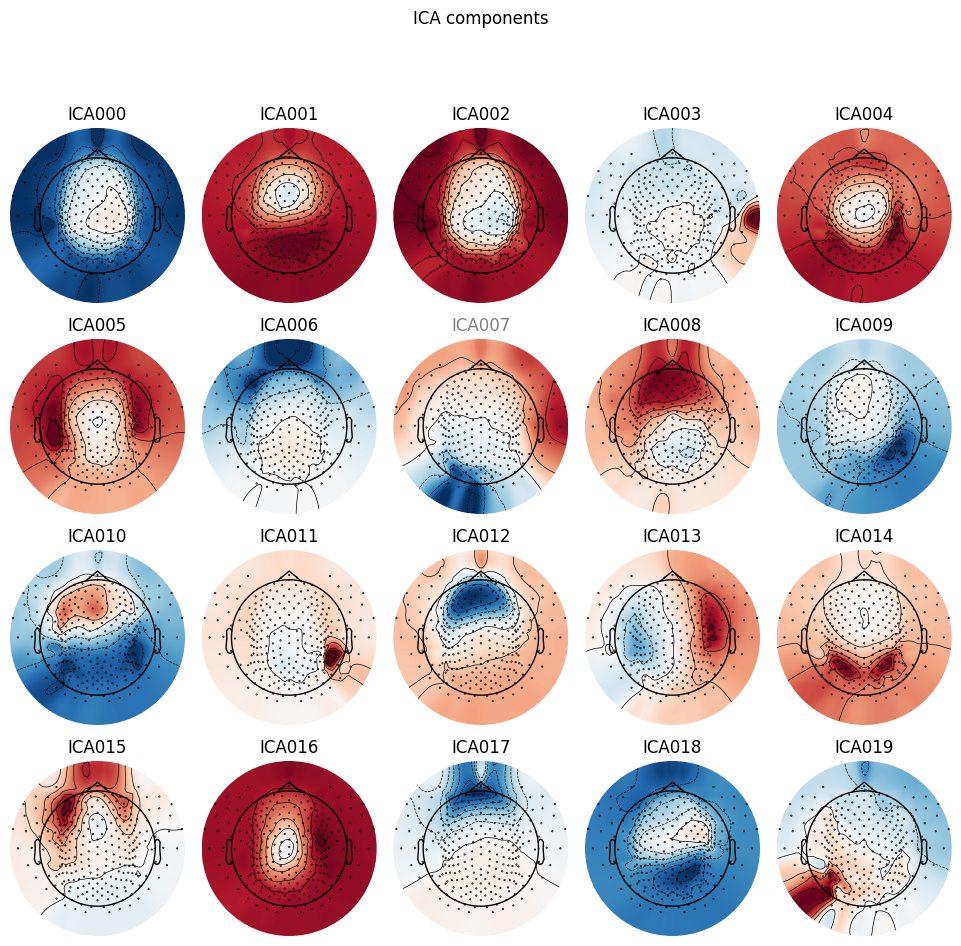

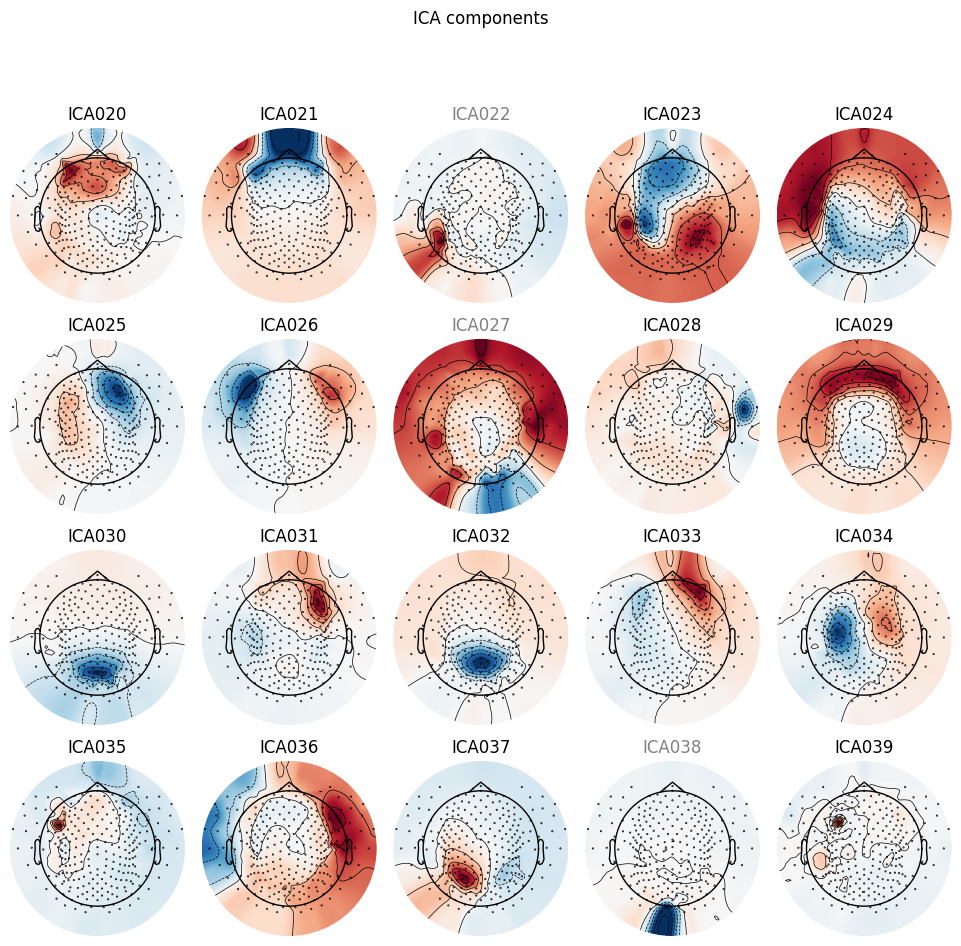

In [9]:
_ = ica_pipe.plot_components()

Display component properties.

    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
3700 matching events found
No baseline correction applied
0 projection items activated


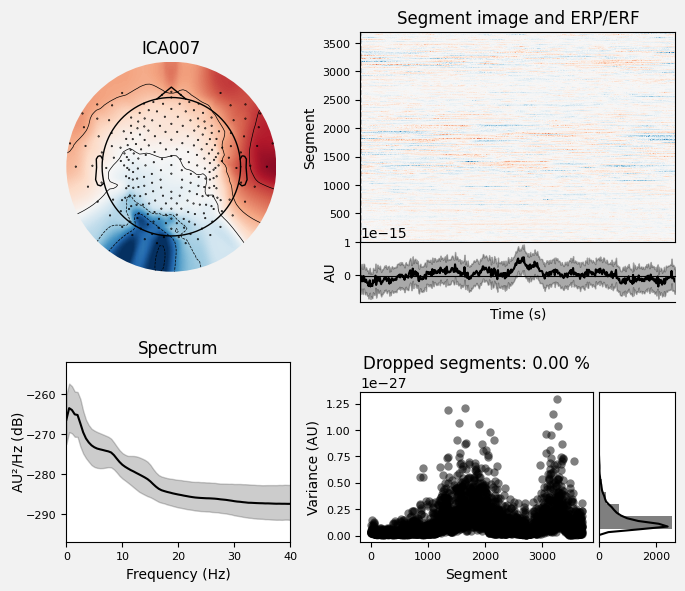

In [10]:
_ = ica_pipe.plot_properties(picks=[7], psd_args=dict(fmin=0, fmax=40))

## Exclude
Apply to the raw signal ICA component exclusion.

In [8]:
ica_pipe.apply()

Excluded ICA components: [38, 27, 22, 7]


Applying ICA to Raw instance
    Transforming to ICA space (40 components)
    Zeroing out 4 ICA components
    Projecting back using 257 PCA components


## Save repaired EEG signal and ica solution

In [13]:
ica_pipe.save_raw("after_ica_raw.fif", overwrite=True)

Overwriting existing file.
Writing C:\Users\Gennadiy\Documents\data\EL3001\ICAPipe\after_ica_raw.fif


Overwriting existing file.
Writing C:\Users\Gennadiy\Documents\data\EL3001\ICAPipe\after_ica_raw-1.fif
Overwriting existing file.
Writing C:\Users\Gennadiy\Documents\data\EL3001\ICAPipe\after_ica_raw-2.fif
Overwriting existing file.
Writing C:\Users\Gennadiy\Documents\data\EL3001\ICAPipe\after_ica_raw-3.fif
Closing C:\Users\Gennadiy\Documents\data\EL3001\ICAPipe\after_ica_raw-3.fif
Closing C:\Users\Gennadiy\Documents\data\EL3001\ICAPipe\after_ica_raw-2.fif
Closing C:\Users\Gennadiy\Documents\data\EL3001\ICAPipe\after_ica_raw-1.fif
Closing C:\Users\Gennadiy\Documents\data\EL3001\ICAPipe\after_ica_raw.fif
[done]


In [69]:
ica_pipe.save_ica(fname="exclude-ica.fif", overwrite=False)

Writing ICA solution to C:\Users\Gennadiy\Documents\data\HZ4\processing\ICAPipe\hz4-ica.fif...
